In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, cos, pi

# To suppress the devide by zero warning of the streamplots
import warnings
warnings.filterwarnings('ignore')

In [3]:
class echarge :
    def __init__(self, position, magnitude):
        self.position  = position
        self.magnitude = magnitude
        
    def field (self, x, y):
        r = [x - self.position[0], y - self.position[1]]
        amp = self.magnitude/(r[0]*r[0] + r[1]*r[1])**(3/2.)
        return amp*r[0], amp*r[1]

In [15]:
def plot_charges(charges, xpoints=(-5, 5, 100), ypoints=(-5, 5, 100)):
    n_charges = len(charges)

    xmin, xmax, xres = xpoints
    ymin, ymax, yres = ypoints
    X, Y = np.meshgrid(np.linspace(xmin, xmax, xres+1), np.linspace(ymin, ymax, yres+1))
    U = np.zeros(np.shape(X))
    V = np.zeros(np.shape(Y))
    for charge in charges:
        field = charge.field(X, Y)
        U += field[0]
        V += field[1]

    chargexs, chargeys = zip(*[c.position for c in charges])

    # start_points on a small circle around charges proportional to magnitude
    radius = 0.2
    num_lines = np.array([np.abs(c.magnitude) * 4 for c in charges], dtype=int)
    i=1
    start_points = np.vstack([ [
            [radius * cos(n*2*pi/num_lines[i]) + chargexs[i],  radius * sin(n*2*pi/num_lines[i]) + chargeys[i]] 
            for n in range(num_lines[i]) ]
        for i in range(n_charges)
    ])

    fig, ax = plt.subplots(1, 1, figsize = (12, 8))
    ax.axis('off')
    ax.streamplot(X, Y, U, V, linewidth=1, start_points=start_points, density=50, zorder=1)

    msizes = 30 * np.array([c.magnitude for c in charges])

    positive = 'b'
    negative = 'r'
    mcolors = np.array([positive for c in charges])
    mcolors[np.sign(msizes)==-1] = negative
    msizes = np.abs(msizes)
    ax.scatter(chargexs, chargeys, s=msizes, c=mcolors, zorder=2)

    return fig.savefig("fieldlines.pdf")

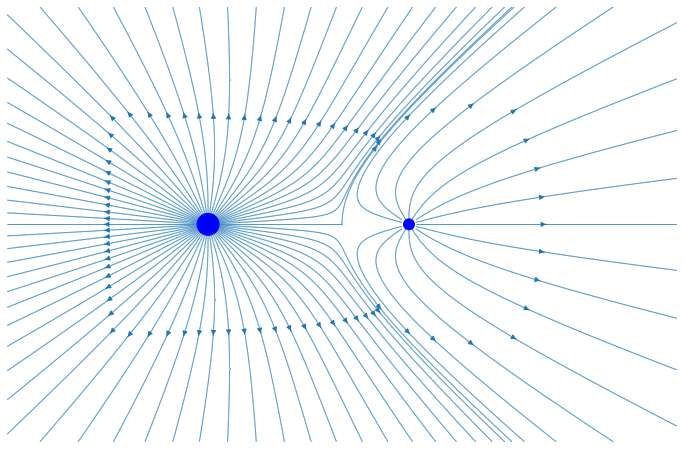

In [16]:
charges = [
    echarge([-2., 0], +16), 
    echarge([+1., 0], +4), 
]
plot_charges(charges)

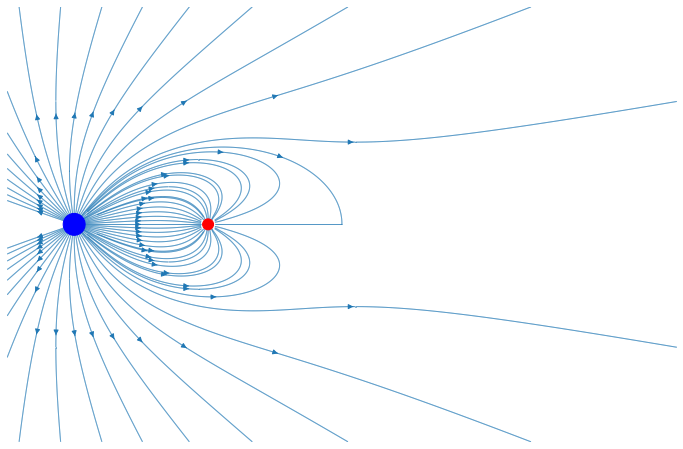

In [19]:
charges = [
    echarge([-4., 0], +16), 
    echarge([-2., 0], -4), 
]
plot_charges(charges)

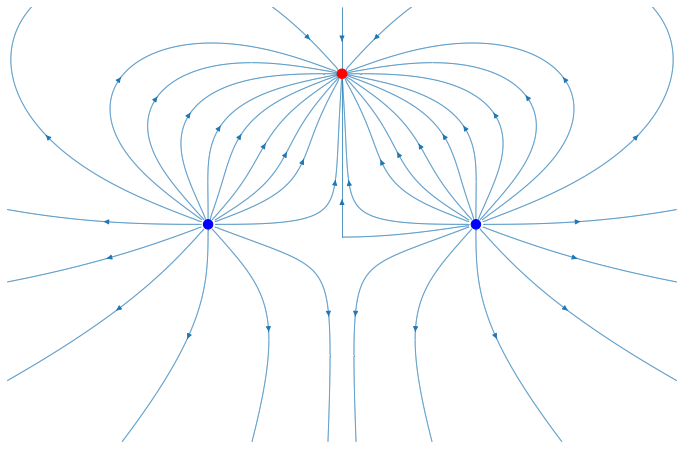

In [20]:
charges = [
    echarge([-2., 0], +3), 
    echarge([+2., 0], +3), 
    echarge([0.,  2*np.sqrt(3)], -3),    
]
plot_charges(charges)

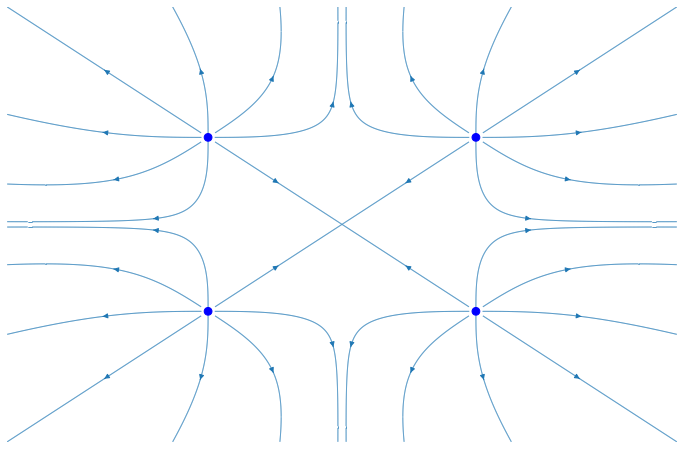

In [23]:
charges = [
    echarge([-2., 2], +2), 
    echarge([-2., -2], +2), 
    echarge([2.,  2], +2),    
    echarge([2.,  -2], +2)
]
plot_charges(charges)

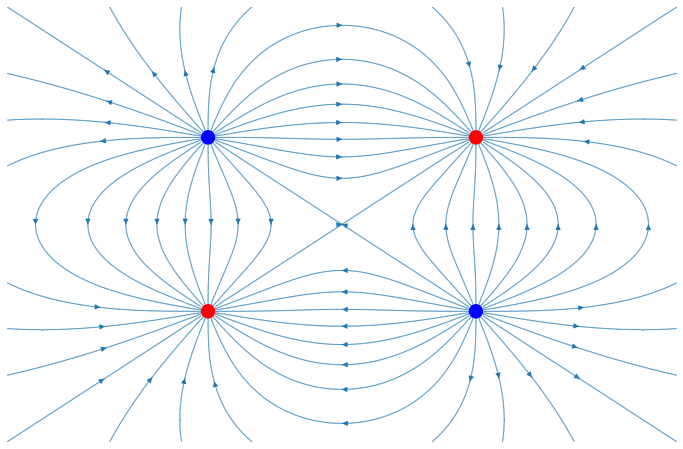

In [24]:
charges = [
    echarge([-2., 2], +6), 
    echarge([-2., -2], -6), 
    echarge([2.,  2], -6),    
    echarge([2.,  -2], +6)
]
plot_charges(charges)